In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import seaborn as sns
sns.set()

In [2]:
from sklearn.cluster import DBSCAN
import pandas as pd

d1 = pd.read_excel('final1.xls')


In [3]:
d1.rename(columns={'Grocery Store % Change 09-14': 'Grocery', 'Convenience Stores % Change 09-14': 'Convenience'}, inplace=True)

In [4]:
d1.dtypes

State                                         object
County                                        object
2010 Census Population                        object
Population Estimate, 2014                     object
Food & Retail Tax 2014                       float64
Fast Food 2009                                 int64
Fast Food 2014                                 int64
Fast Food % Change 09-14                     float64
Full Service 2009                              int64
Full Service 2014                              int64
Full Service % Change 09-14                  float64
Grocery Store 09                               int64
Grocery Store 2014                             int64
Grocery                                      float64
Supercenters & Club Stores 2009                int64
Supercenters & Club Stores 2014                int64
Supercenters & Club Stores % Change 09-14    float64
Convenience Stores 2009                        int64
Convenience Stores 2014                       

In [5]:
d1_selected = d1[["Convenience", "Grocery"]]


In [6]:
d1_selected[:10]

,Convenience,Grocery
0,3.448276,-33.333333
1,-0.840336,20.833333
2,35.714286,0.000000
3,-21.052632,-16.666667
4,-12.903226,0.000000
5,50.000000,0.000000
6,-12.500000,0.000000
7,-15.909091,8.000000
8,4.545455,0.000000
9,28.571429,25.000000


In [7]:
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler().fit(d1_selected)
d1_transformed = stdscaler.transform(d1_selected)

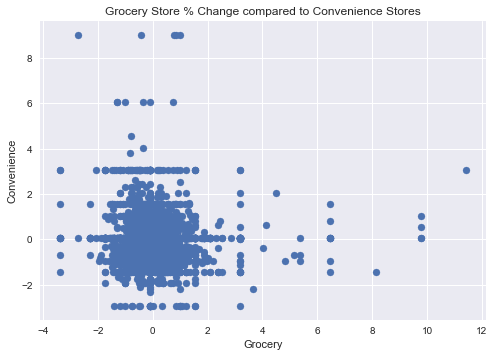

In [8]:
plt.scatter(d1_transformed[:,0], d1_transformed[:,1])
plt.xlabel("Grocery")
plt.ylabel("Convenience")
plt.title("Grocery Store % Change compared to Convenience Stores")
plt.savefig("food4.png", format = "PNG")

In [9]:
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(d1_transformed)

In [10]:
labels = dbsc.labels_

core_samples = np.zeros_like(labels, dtype = bool)

In [11]:
unique_labels = np.unique(labels)
unique_labels

array([-1,  0], dtype=int64)

In [12]:
d1['cluster'] = labels
d1.sort_values('cluster')
centers = d1.groupby('cluster').mean()

In [13]:
d1.dtypes

State                                         object
County                                        object
2010 Census Population                        object
Population Estimate, 2014                     object
Food & Retail Tax 2014                       float64
Fast Food 2009                                 int64
Fast Food 2014                                 int64
Fast Food % Change 09-14                     float64
Full Service 2009                              int64
Full Service 2014                              int64
Full Service % Change 09-14                  float64
Grocery Store 09                               int64
Grocery Store 2014                             int64
Grocery                                      float64
Supercenters & Club Stores 2009                int64
Supercenters & Club Stores 2014                int64
Supercenters & Club Stores % Change 09-14    float64
Convenience Stores 2009                        int64
Convenience Stores 2014                       

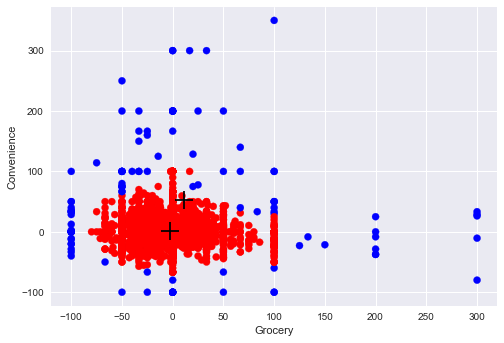

In [14]:
import numpy as np
colors = np.array(['red', 'green', 'blue'])

import matplotlib.pyplot as plt
plt.scatter(d1.Grocery, d1.Convenience, c=colors[d1.cluster], s=50)
plt.scatter(centers.Grocery, centers.Convenience, linewidths=3, marker='+', s=300, c='black')
plt.xlabel('Grocery')
plt.ylabel('Convenience')
plt.savefig("dbscan__array_food2.png", format = "PNG")

In [15]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

C:\Users\kdsing2\Anaconda3\lib\site-packages\matplotlib\lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


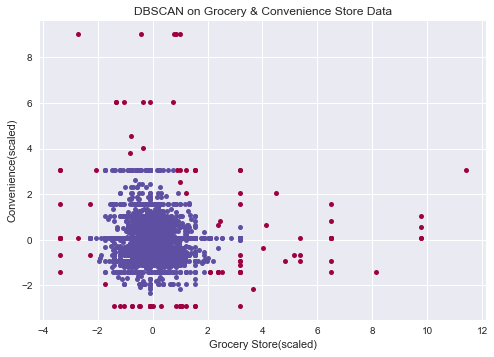

In [16]:
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = d1_transformed[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    xy2 = d1_transformed[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = color, markersize = 5)

plt.title("DBSCAN on Grocery & Convenience Store Data")
plt.xlabel("Grocery Store(scaled)")
plt.ylabel("Convenience(scaled)")
plt.savefig("dbscan_food2.png", format = "PNG")

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2).fit(d1_transformed)
labels_kmeans = kmeans.labels_
centroids = kmeans.cluster_centers_

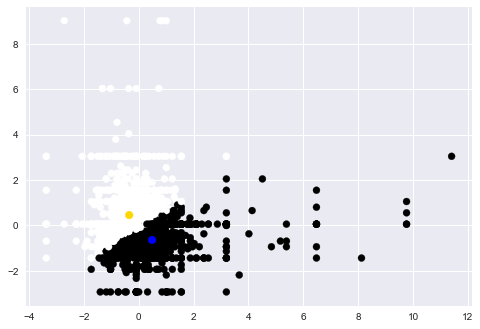

In [18]:
plt.scatter(d1_transformed[:,0], d1_transformed[:,1], c = labels_kmeans)
plt.scatter(centroids[:,0], centroids[:,1], c = ["gold","blue"], s = 60 )
plt.savefig("kmeans_food3.png", format = "PNG")

In [19]:
def train_test_rmse(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

NameError: name 'y' is not defined